In [1]:
import numpy as np 
import matplotlib.pyplot as plt

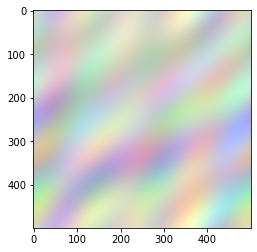

In [3]:
def generate_noise(size, lowpass):
    W = np.random.random((size, size))
    freqs = np.fft.fftfreq(size)
    f = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            f[i,j] - freqs[i]**2 + freqs[j]**2
    
    fW = np.fft.fft2(W) / (f + 0.00000001)
    filter = np.zeros((size, size))
    filter[0:lowpass, 0:lowpass] = 1
    fW = fW * filter
    noise = np.abs(np.fft.ifft2(fW))
    noise = (noise - np.min(noise)) / (np.max(noise) - np.min(noise))
    return noise

R = (np.ones((500,500)) * 0.6 ) + 0.4 * generate_noise(500,5)
G = (np.ones((500,500)) * 0.6 ) + 0.4 * generate_noise(500,5)
B = (np.ones((500,500)) * 0.6 ) + 0.4 * generate_noise(500,5)

img = np.dstack((R,G,B))

plt.imshow(img)